In [1]:
# data handling

import pandas as pd
import numpy as np

# stats packages

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import (cross_val_score, train_test_split, KFold, GridSearchCV)
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import statsmodels.api as sm

# visualization, other

import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# read in clean dataframe

raw_df = pd.read_csv(r'/Users/sam/Desktop/clean_ticker_df.csv').drop(['Unnamed: 0'],axis=1)
raw_df.head()

,equity,sector,industry,publishing_analysts,enterprise_value,market_cap,daily_vol,mrq_assets,ltm_rev,gross_margin,...,cons_cycl,cons_def,energy,fin_services,healthcare,industrials,niche,real_estate,tech,utilities
0,A,Healthcare,Diagnostics & Research,17,4.807000e+10,4.633000e+10,3024800.0,9.627000e+09,5.820000e+09,0.487973,...,0,0,0,0,1,0,0,0,0,0
1,AA,Basic Materials,Aluminum,10,9.570000e+09,7.360000e+09,1861400.0,1.486000e+10,1.046000e+10,0.130019,...,0,0,0,0,0,0,0,0,0,0
2,AAL,Industrials,Airlines,21,4.405000e+10,1.371000e+10,6423700.0,6.200800e+10,1.869000e+10,-0.296415,...,0,0,0,0,0,1,0,0,0,0
3,AAP,Consumer Cyclical,Specialty Retail,26,1.646000e+10,1.385000e+10,646500.0,1.183964e+10,1.074000e+10,0.417132,...,1,0,0,0,0,0,0,0,0,0
4,AAPL,Technology,Consumer Electronics,40,2.350000e+12,2.410000e+12,166700000.0,3.238880e+11,3.471600e+11,0.302339,...,0,0,0,0,0,0,0,0,1,0


In [4]:
# eliminate massive outliers based on prelim regression below

i = raw_df[((raw_df.equity == 'AXP') | 
        (raw_df.equity == 'DTM') | 
        (raw_df.equity == 'FOX') |
        (raw_df.equity == 'Z') | 
        (raw_df.equity == 'CLR') | 
        (raw_df.equity == 'FB') | 
        (raw_df.equity == 'GPN') |
        (raw_df.equity == 'MRK') |
        (raw_df.equity == 'NFLX') |
        (raw_df.equity == 'PANW') |
        (raw_df.equity == 'PYPL') |
        (raw_df.equity == 'SPLK') |
        (raw_df.equity == 'SQ'))].index
raw_df.drop(i,inplace=True)
raw_df.reset_index(drop=True)

,equity,sector,industry,publishing_analysts,enterprise_value,market_cap,daily_vol,mrq_assets,ltm_rev,gross_margin,...,cons_cycl,cons_def,energy,fin_services,healthcare,industrials,niche,real_estate,tech,utilities
0,A,Healthcare,Diagnostics & Research,17,4.807000e+10,4.633000e+10,3024800.0,9.627000e+09,5.820000e+09,0.487973,...,0,0,0,0,1,0,0,0,0,0
1,AA,Basic Materials,Aluminum,10,9.570000e+09,7.360000e+09,1861400.0,1.486000e+10,1.046000e+10,0.130019,...,0,0,0,0,0,0,0,0,0,0
2,AAL,Industrials,Airlines,21,4.405000e+10,1.371000e+10,6423700.0,6.200800e+10,1.869000e+10,-0.296415,...,0,0,0,0,0,1,0,0,0,0
3,AAP,Consumer Cyclical,Specialty Retail,26,1.646000e+10,1.385000e+10,646500.0,1.183964e+10,1.074000e+10,0.417132,...,1,0,0,0,0,0,0,0,0,0
4,AAPL,Technology,Consumer Electronics,40,2.350000e+12,2.410000e+12,166700000.0,3.238880e+11,3.471600e+11,0.302339,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,ZION,Financial Services,Banks—Regional,20,8.570000e+09,8.570000e+09,1598200.0,8.147900e+10,3.190000e+09,0.752351,...,0,0,0,1,0,0,0,0,0,0
977,ZM,Technology,Software—Application,23,1.100500e+11,1.146300e+11,2135700.0,5.297993e+09,3.280000e+09,0.557927,...,0,0,0,0,0,0,0,0,1,0
978,ZNGA,Communication Services,Electronic Gaming & Multimedia,13,1.119000e+10,1.112000e+10,10300000.0,6.206500e+09,2.250000e+09,0.515556,...,0,0,0,0,0,0,0,0,0,0
979,ZS,Technology,Software—Infrastructure,27,3.196000e+10,3.247000e+10,1058600.0,1.833458e+09,6.019100e+08,0.557459,...,0,0,0,0,0,0,0,0,1,0


In [5]:
# top industries by freq. representation in the data

top_sect = (raw_df.groupby('sector').equity
    .count()
    .reset_index()
    .sort_values('equity',ascending=False))
top_sect

,sector,equity
10,Technology,177
5,Financial Services,140
7,Industrials,139
2,Consumer Cyclical,129
6,Healthcare,119
9,Real Estate,69
3,Consumer Defensive,55
0,Basic Materials,42
1,Communication Services,42
11,Utilities,38


In [6]:
# create log values

raw_df['log_ev'] = np.log(raw_df.enterprise_value)
raw_df['log_mc'] = np.log(raw_df.market_cap)
raw_df['log_vol'] = np.log(raw_df.daily_vol)
raw_df['log_assets'] = np.log(raw_df.mrq_assets)
raw_df['log_rev'] = np.log(raw_df.ltm_rev)

In [7]:
# generate scaled feature values

std = StandardScaler()
std.fit(raw_df[['log_mc','log_vol','log_assets','log_rev']].values)

raw_df[['log_mc','log_vol','log_assets','log_rev']] = std.transform(raw_df[['log_mc','log_vol','log_assets','log_rev']].values)
raw_df.columns

Index(['equity', 'sector', 'industry', 'publishing_analysts',
       'enterprise_value', 'market_cap', 'daily_vol', 'mrq_assets', 'ltm_rev',
       'gross_margin', 'operating_margin', 'ebitda_margin', 'roa', 'roe',
       'growth', 'comm_services', 'cons_cycl', 'cons_def', 'energy',
       'fin_services', 'healthcare', 'industrials', 'niche', 'real_estate',
       'tech', 'utilities', 'log_ev', 'log_mc', 'log_vol', 'log_assets',
       'log_rev'],
      dtype='object')

In [8]:
# group aggregate, nominal, log features

df_agg = raw_df[['equity','publishing_analysts','industry','enterprise_value',
         'log_ev','market_cap','log_mc','daily_vol','log_vol','mrq_assets','log_assets',
         'ltm_rev','log_rev','gross_margin','operating_margin','ebitda_margin','roa',
         'roe','growth','comm_services','cons_cycl','cons_def','energy','fin_services', 
         'healthcare','industrials','niche','real_estate','tech','utilities']]

df_nom = raw_df[['publishing_analysts','enterprise_value','market_cap','daily_vol',
         'mrq_assets','ltm_rev','gross_margin','operating_margin','ebitda_margin',
         'roa','roe','growth']]

df_logs = raw_df[['publishing_analysts','log_ev','log_mc','log_vol','log_assets','log_rev',
          'gross_margin','operating_margin','ebitda_margin','roa','roe','growth']]

df_sect = raw_df[['publishing_analysts','comm_services','cons_cycl','cons_def',
          'energy','fin_services','healthcare','industrials','niche','real_estate',
          'tech','utilities']]

df_Y = raw_df['publishing_analysts']

df_X = raw_df[['log_mc','log_vol','log_assets','log_rev',#'roa','roe','growth',
          'comm_services','cons_cycl','cons_def',
          'energy','fin_services','healthcare','industrials','niche','real_estate',
          'tech','utilities']]


In [9]:
# key feature sample

df_agg[['equity','publishing_analysts','industry',
         'log_ev','log_mc','log_vol','log_assets',
         'log_rev','comm_services','cons_cycl','cons_def','energy','fin_services', 
         'healthcare','industrials','niche','real_estate','tech','utilities']].head(20)

,equity,publishing_analysts,industry,log_ev,log_mc,log_vol,log_assets,log_rev,comm_services,cons_cycl,cons_def,energy,fin_services,healthcare,industrials,niche,real_estate,tech,utilities
0,A,17,Diagnostics & Research,24.595924,0.851305,0.508518,-0.131430,0.139763,0,0,0,0,0,1,0,0,0,0,0
1,AA,10,Aluminum,22.981899,-0.803836,0.087714,0.161488,0.544249,0,0,0,0,0,0,0,0,0,0,0
2,AAL,21,Airlines,24.508591,-0.244185,1.161283,1.125457,0.944713,0,0,0,0,0,0,1,0,0,0,0
3,AAP,26,Specialty Retail,23.524199,-0.235045,-0.828847,0.008167,0.562475,0,1,0,0,0,0,0,0,0,0,0
4,AAPL,40,Consumer Electronics,28.485436,4.406417,3.983481,2.240942,2.960588,0,0,0,0,0,0,0,0,0,1,0
5,ABBV,21,Drug Manufacturers—General,26.378348,2.210772,2.024944,1.724066,1.673282,0,0,0,0,0,1,0,0,0,0,0
6,ABC,10,Medical Distribution,23.984051,0.312339,-0.119073,0.898163,2.567152,0,0,0,0,0,1,0,0,0,0,0
7,ABT,21,Medical Devices,26.141364,2.232825,2.034849,1.231386,1.473640,0,0,0,0,0,1,0,0,0,0,0
8,ACC,3,REIT—Residential,23.135602,-0.860596,-0.176812,-0.297101,-1.166083,0,0,0,0,0,0,0,0,1,0,0
9,ACGL,11,Insurance—Diversified,23.703377,-0.134945,0.650498,0.882865,0.480729,0,0,0,0,1,0,0,0,0,0,0


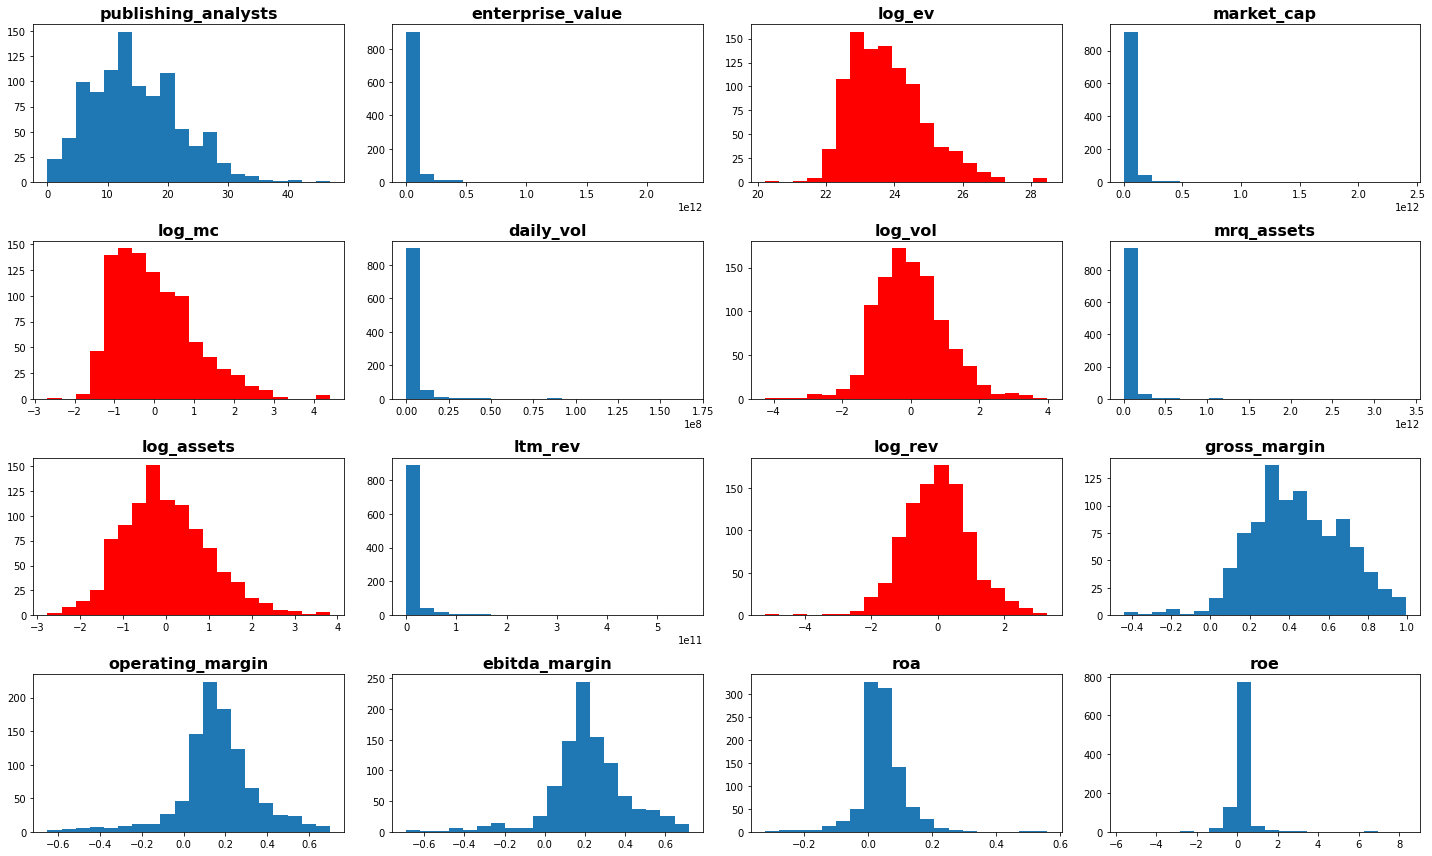

In [10]:
# let's graph these puppies

plt.figure(figsize=(20,12))

plt.subplot(4,4,1)
plt.hist(df_agg.publishing_analysts,bins=20)
plt.title('publishing_analysts',fontweight='bold',fontsize=16)

plt.subplot(4,4,2)
plt.hist(df_agg.enterprise_value,bins=20)
plt.title('enterprise_value',fontweight='bold',fontsize=16)

plt.subplot(4,4,3)
plt.hist(df_agg.log_ev,bins=20,color='r')
plt.title('log_ev',fontweight='bold',fontsize=16)

plt.subplot(4,4,4)
plt.hist(df_agg.market_cap,bins=20)
plt.title('market_cap',fontweight='bold',fontsize=16)

plt.subplot(4,4,5)
plt.hist(df_agg.log_mc,bins=20,color='r')
plt.title('log_mc',fontweight='bold',fontsize=16)

plt.subplot(4,4,6)
plt.hist(df_agg.daily_vol,bins=20)
plt.title('daily_vol',fontweight='bold',fontsize=16)

plt.subplot(4,4,7)
plt.hist(df_agg.log_vol,bins=20,color='r')
plt.title('log_vol',fontweight='bold',fontsize=16)

plt.subplot(4,4,8)
plt.hist(df_agg.mrq_assets,bins=20)
plt.title('mrq_assets',fontweight='bold',fontsize=16)

plt.subplot(4,4,9)
plt.hist(df_agg.log_assets,bins=20,color='r')
plt.title('log_assets',fontweight='bold',fontsize=16)

plt.subplot(4,4,10)
plt.hist(df_agg.ltm_rev,bins=20)
plt.title('ltm_rev',fontweight='bold',fontsize=16)

plt.subplot(4,4,11)
plt.hist(df_agg.log_rev,bins=20,color='r')
plt.title('log_rev',fontweight='bold',fontsize=16)

plt.subplot(4,4,12)
plt.hist(df_agg.gross_margin,bins=20)
plt.title('gross_margin',fontweight='bold',fontsize=16)

plt.subplot(4,4,13)
plt.hist(df_agg.operating_margin,bins=20)
plt.title('operating_margin',fontweight='bold',fontsize=16)

plt.subplot(4,4,14)
plt.hist(df_agg.ebitda_margin,bins=20)
plt.title('ebitda_margin',fontweight='bold',fontsize=16)

plt.subplot(4,4,15)
plt.hist(df_agg.roa,bins=20)
plt.title('roa',fontweight='bold',fontsize=16)

plt.subplot(4,4,16)
plt.hist(df_agg.roe,bins=20)
plt.title('roe',fontweight='bold',fontsize=16)

plt.tight_layout()

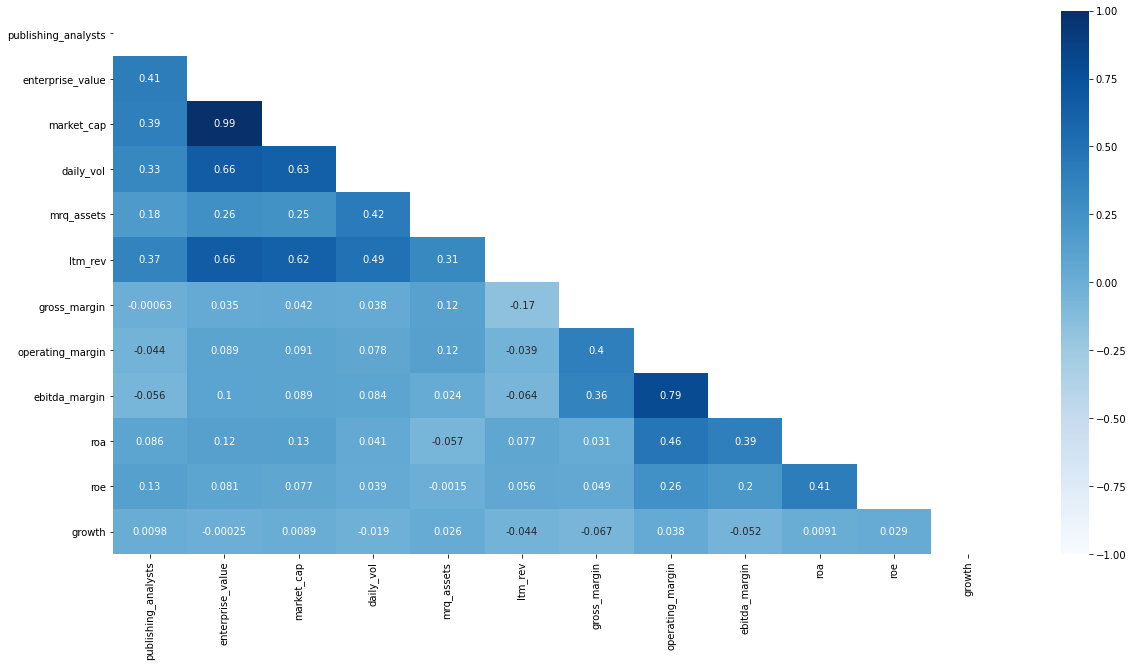

In [11]:
plt.figure(figsize=(20,10))
upper = np.triu(df_nom.corr())  # optionally, you can just look at the lower triangle
sns.heatmap(df_nom.corr(), cmap="Blues", annot=True, vmin=-1, vmax=1, mask=upper);

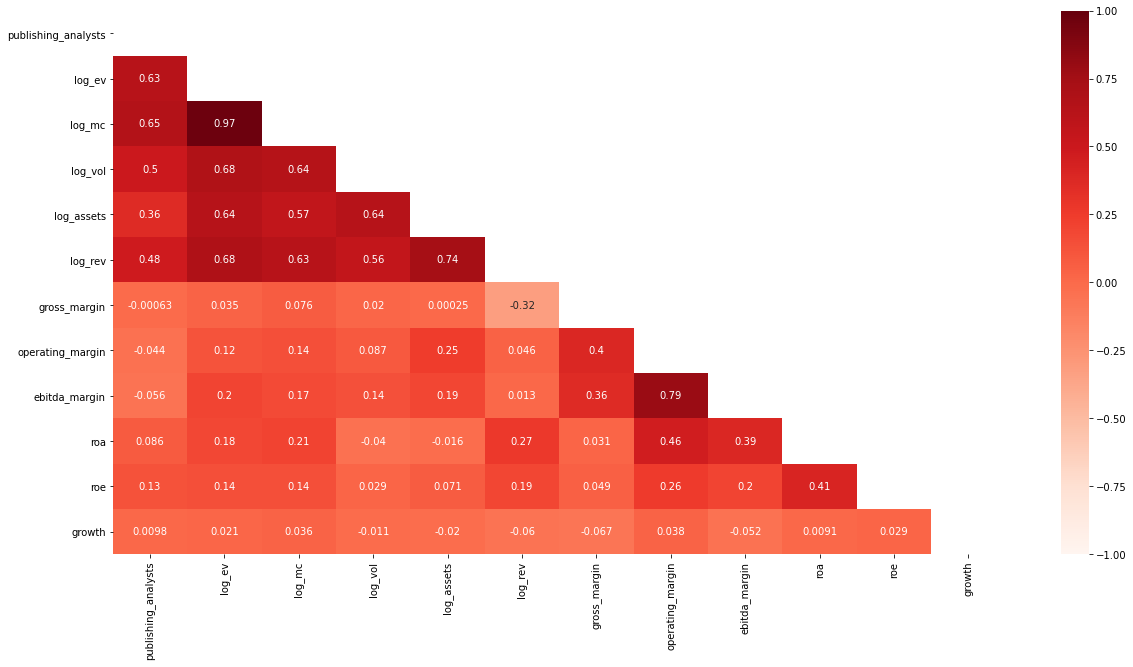

In [12]:
plt.figure(figsize=(20,10))
upper = np.triu(df_logs.corr())  # optionally, you can just look at the lower triangle
sns.heatmap(df_logs.corr(), cmap="Reds", annot=True, vmin=-1, vmax=1, mask=upper);

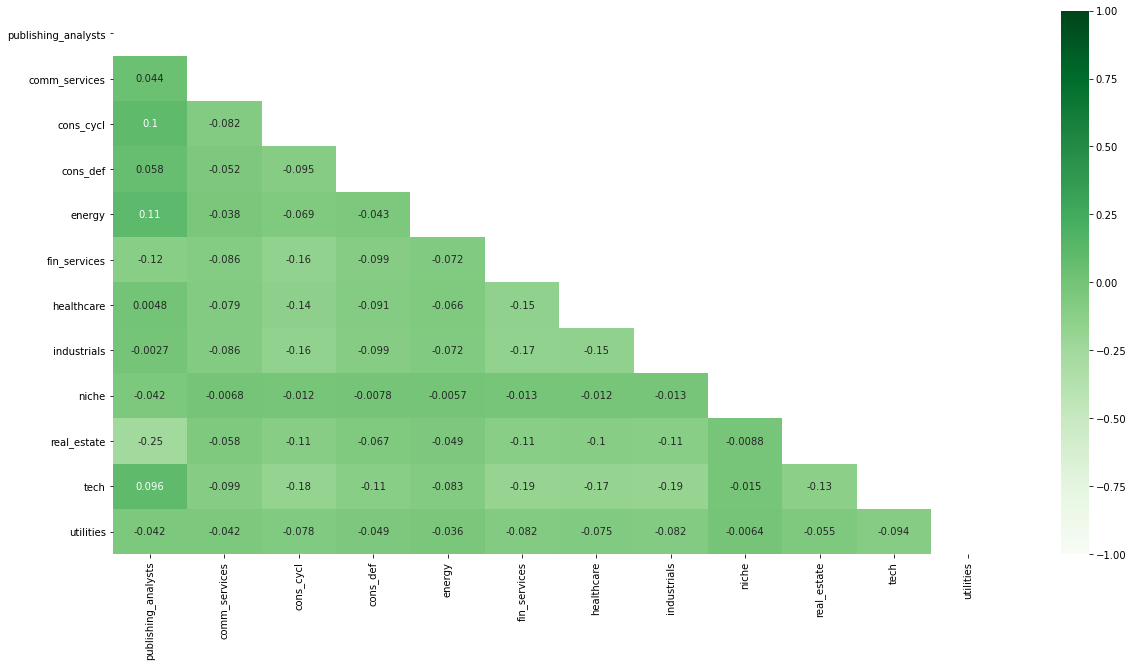

In [13]:
plt.figure(figsize=(20,10))
upper = np.triu(df_sect.corr())  # optionally, you can just look at the lower triangle
sns.heatmap(df_sect.corr(), cmap="Greens", annot=True, vmin=-1, vmax=1, mask=upper);

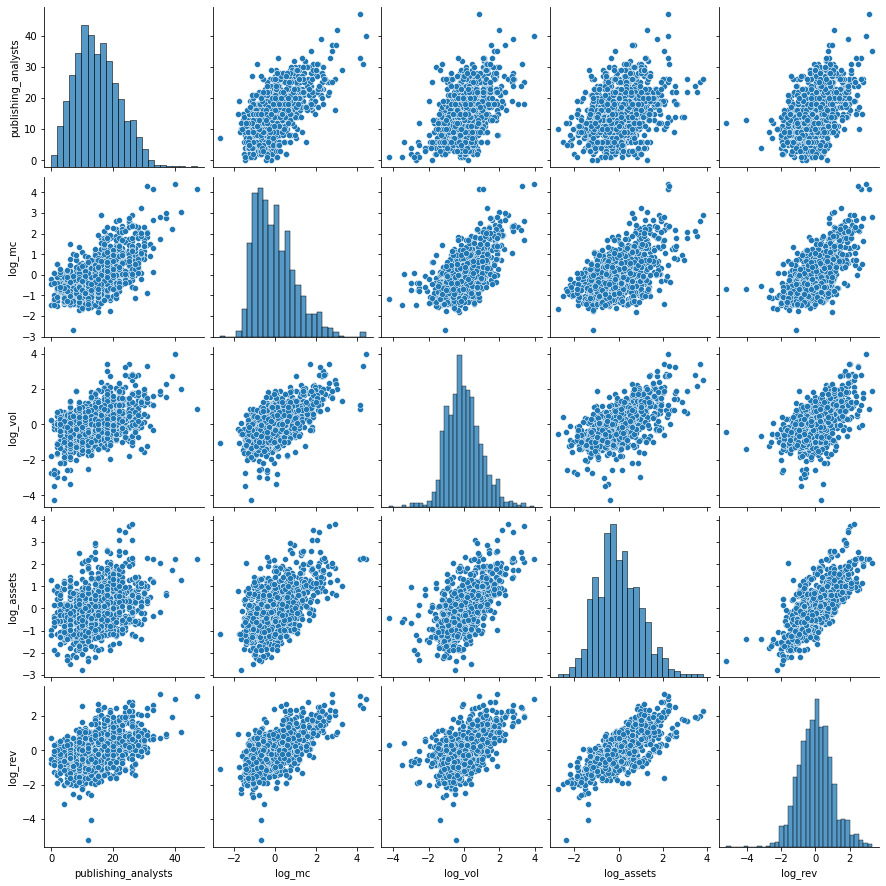

In [14]:
sns.pairplot(df_agg[['publishing_analysts','log_mc','log_vol','log_assets','log_rev']])

In [15]:
# training, testing, validation
# training, testing, validation
# training, testing, validation
# training, testing, validation
# training, testing, validation
# training, testing, validation

In [16]:
# Mean Absolute Error (MAE)

def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

In [17]:
def diagnostic_plots(y_pred, y_true, resid,title='Diagnostic plots'):
    fig, axes = plt.subplots(1, 3, figsize=(16, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted')
    g1.set_ylabel('Actual')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle(title,fontweight='bold',fontsize=16);
    fig.tight_layout();

In [18]:
# same as above, just making it vertical for presentation

def vert_diagnostic_plots(y_pred, y_true, resid,title='Diagnostic plots'):
    fig, axes = plt.subplots(3, 1, figsize=(10, 12))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted')
    g1.set_ylabel('Actual')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle(title,fontweight='bold',fontsize=16);
    fig.tight_layout();

In [19]:
# split data 80-20 train_val/test

X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=42)


# designate KFold object 

kf = KFold(n_splits=5,shuffle=True,random_state=0)

Vanilla linear model:
-------------------------------------------------
Vanilla LR cross-validation score:  0.514
Vanilla R^2 on training data of:  0.5425
Vanilla LR MAE on training data of:  3.9218
-------------------------------------------------


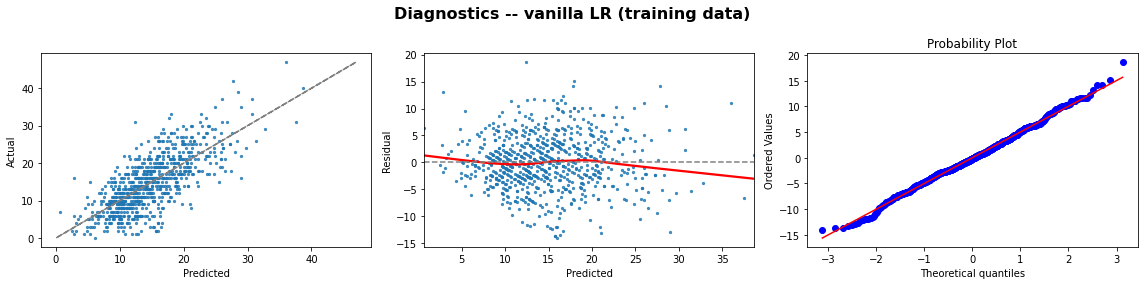

In [20]:
# vanilla linear regression

print('\033[1m''Vanilla linear model:''\033[0m')
print('-------------------------------------------------')

lr = LinearRegression()

# training data

lr_train_cv_scores = cross_val_score(lr,X_train,Y_train,cv=kf)
lr_train_cv_avg_score = np.mean(lr_train_cv_scores)

lr_fit = lr.fit(X_train,Y_train)
lr_ytrain_preds = lr_fit.predict(X_train)
lr_ytrain_res = Y_train - lr_ytrain_preds

# visualization

print('Vanilla LR cross-validation score: ',round(lr_train_cv_avg_score,4))
print('Vanilla R^2 on training data of: ',round(r2_score(Y_train,lr_ytrain_preds),4))
print('Vanilla LR MAE on training data of: ',round(mae(Y_train,lr_ytrain_preds),4))
print('-------------------------------------------------')

diagnostic_plots(lr_ytrain_preds,Y_train,lr_ytrain_res,title='Diagnostics -- vanilla LR (training data)')

In [30]:
print('\033[1m''Vanilla LR model coefficient assignment by feature: ''\033[0m')
print('---------------------------------------------------')
list(zip(X_train.columns,lr.fit(X_train,Y_train).coef_))

Vanilla LR model coefficient assignment by feature: 
---------------------------------------------------


[('log_mc', 4.035320181170686),
 ('log_vol', 1.1849758300298086),
 ('log_assets', 0.25304860053911193),
 ('log_rev', -0.10955040615800127),
 ('comm_services', -2.347199878348221),
 ('cons_cycl', 2.4644331094124827),
 ('cons_def', -0.2154348018241661),
 ('energy', 2.7068679993013487),
 ('fin_services', -2.579272229452887),
 ('healthcare', -1.3146057640936581),
 ('industrials', -0.194077073175095),
 ('niche', -3.977322048576674),
 ('real_estate', -6.9912878861159955),
 ('tech', 0.45117394248471565),
 ('utilities', -3.7815499302896964)]

Lasso model:
-------------------------------------------------
Optimal alpha:  Lasso(alpha=0.250626566416031)
Lasso cross-validation score:  0.465
Lasso R^2 on training data of:  0.4848
Lasso MAE on training data of:  4.1964
-------------------------------------------------


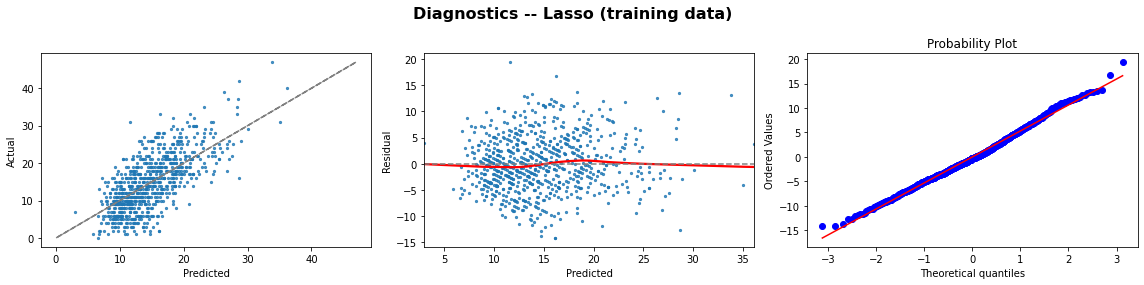

In [21]:
# LASSO regression w standardized features

print('\033[1m''Lasso model:''\033[0m')
print('-------------------------------------------------')

# identify optimal hyperparameters 

params = {
    'alpha': np.linspace(-100,100,400)
}

lasso_grid_est = GridSearchCV(Lasso(),
                           param_grid=params,
                           cv=kf,
                           return_train_score=False)

lasso_grid_est.fit(X_train,Y_train).best_estimator_

# training data

lasso = Lasso(alpha=0.250626566416031)

lasso_train_cv_scores = cross_val_score(lasso,X_train,Y_train,cv=kf)
lasso_train_cv_avg_score = np.mean(lasso_train_cv_scores)

lasso_ytrain_preds = lasso.fit(X_train,Y_train).predict(X_train)
lasso_ytrain_res = Y_train - lasso_ytrain_preds


# visualization

print('Optimal alpha: ',lasso_grid_est.fit(X_train,Y_train).best_estimator_)
print('Lasso cross-validation score: ',round(lasso_train_cv_avg_score,4))
print('Lasso R^2 on training data of: ',round(r2_score(Y_train,lasso_ytrain_preds),4))
print('Lasso MAE on training data of: ',round(mae(Y_train,lasso_ytrain_preds),4))
print('-------------------------------------------------')

diagnostic_plots(lasso_ytrain_preds,Y_train,lasso_ytrain_res,title='Diagnostics -- Lasso (training data)')

In [22]:
print('\033[1m''Lasso model coefficient assignment by feature: ''\033[0m')
print('---------------------------------------------------')
list(zip(X_train.columns,lasso.fit(X_train,Y_train).coef_))

Lasso model coefficient assignment by feature: 
---------------------------------------------------


[('log_mc', 3.914733546996837),
 ('log_vol', 0.8005792478454785),
 ('log_assets', -0.0),
 ('log_rev', 0.35191537608176093),
 ('comm_services', -0.0),
 ('cons_cycl', 1.0640758400497423),
 ('cons_def', 0.0),
 ('energy', 0.0),
 ('fin_services', -0.0),
 ('healthcare', -0.0),
 ('industrials', 0.0),
 ('niche', -0.0),
 ('real_estate', -2.0450649611819007),
 ('tech', 0.0),
 ('utilities', -0.0)]

Ridge model:
-------------------------------------------------
Optimal alpha:  Ridge(alpha=3.002001334222815)
Ridge cross-validation score:  0.5148
Ridge R^2 on training data of:  0.5417
Ridge MAE on training data of:  3.9361


Ridge R^2 on test data of:  0.4598
Ridge MAE on test data of:  4.163 
-------------------------------------------------


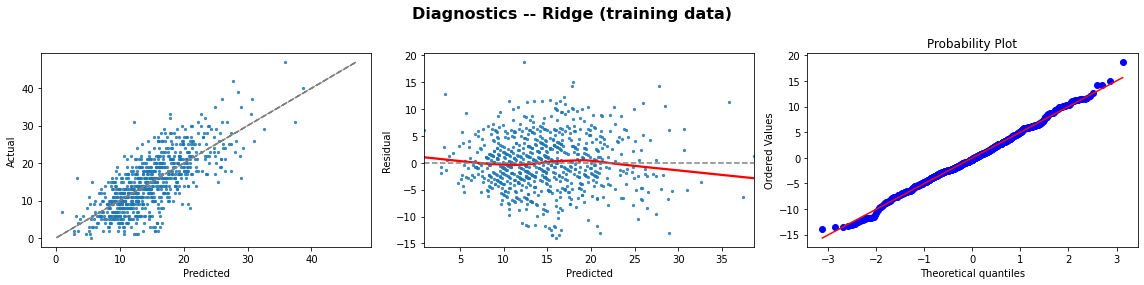

In [23]:
# Ridge regression w standardized features

print('\033[1m''Ridge model:''\033[0m')
print('-------------------------------------------------')

# identify optimal hyperparameters 

params = {
    'alpha': np.linspace(0,150,1500)
}

ridge_grid_est = GridSearchCV(Ridge(),
                           param_grid=params,
                           cv=kf,
                           return_train_score=False)

ridge_grid_est.fit(X_train,Y_train).best_estimator_

# training data

ridge = Ridge(alpha=3.002001334222815)

ridge_train_cv_scores = cross_val_score(ridge,X_train,Y_train,cv=kf)
ridge_train_cv_avg_score = np.mean(ridge_train_cv_scores)

ridge_ytrain_preds = ridge.fit(X_train,Y_train).predict(X_train)
ridge_ytrain_res = Y_train - ridge_ytrain_preds

# testing data

ridge_ytest_preds = ridge.fit(X_train,Y_train).predict(X_test)
ridge_ytest_res = Y_test - ridge_ytest_preds

# visualization

print('Optimal alpha: ',ridge_grid_est.fit(X_train,Y_train).best_estimator_)
print('Ridge cross-validation score: ',round(ridge_train_cv_avg_score,4))
print('Ridge R^2 on training data of: ',round(r2_score(Y_train,ridge_ytrain_preds),4))
print('Ridge MAE on training data of: ',round(mae(Y_train,ridge_ytrain_preds),4))
print('\n')
print('\033[1m''Ridge R^2 on test data of: ',round(r2_score(Y_test,ridge_ytest_preds),4))
print('Ridge MAE on test data of: ',round(mae(Y_test,ridge_ytest_preds),4),'\033[0m')
print('-------------------------------------------------')

diagnostic_plots(ridge_ytrain_preds,Y_train,ridge_ytrain_res,title='Diagnostics -- Ridge (training data)')

In [24]:
print('\033[1m''Ridge model coefficient assignment by feature: ''\033[0m')
print('---------------------------------------------------')
list(zip(X_train.columns,ridge.fit(X_train,Y_train).coef_))

Ridge model coefficient assignment by feature: 
---------------------------------------------------


[('log_mc', 3.9700581940280855),
 ('log_vol', 1.2077429926400571),
 ('log_assets', 0.14414650023400633),
 ('log_rev', 0.042828259115438555),
 ('comm_services', -1.5445233774443445),
 ('cons_cycl', 2.9325149138509445),
 ('cons_def', 0.3019292112187445),
 ('energy', 2.913761107589564),
 ('fin_services', -1.838713077410183),
 ('healthcare', -0.6668972984879149),
 ('industrials', 0.3710727603646825),
 ('niche', -0.8297688406434854),
 ('real_estate', -5.941306690097317),
 ('tech', 1.0573297754347564),
 ('utilities', -2.8373572292666767)]

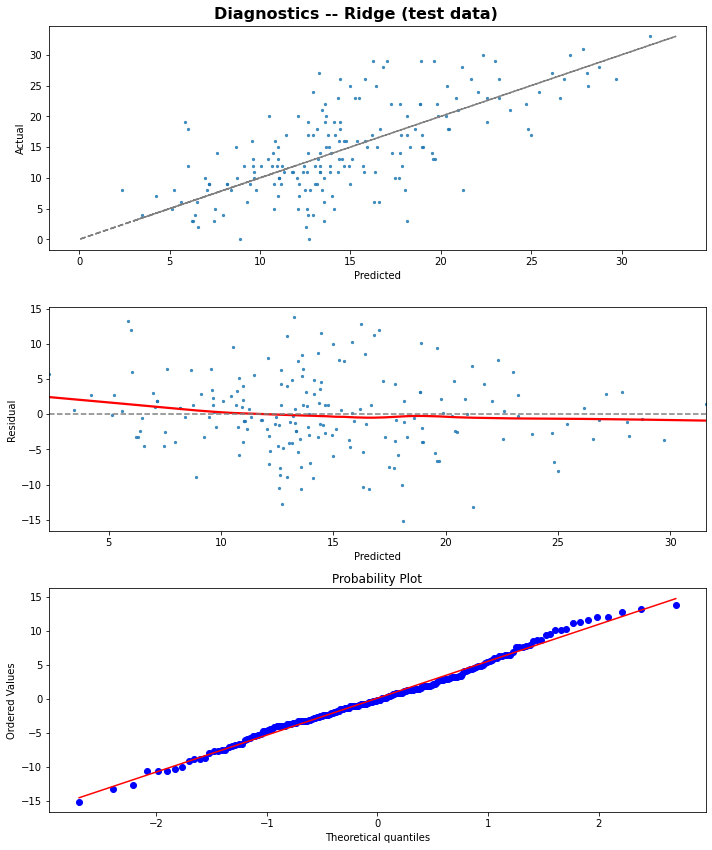

In [25]:
vert_diagnostic_plots(ridge_ytest_preds,Y_test,ridge_ytest_res,title='Diagnostics -- Ridge (test data)')

Vanilla LR resid. mean of:  7.159805628194887e-16
Lasso resid. mean of:  -4.531522549490435e-16
Ridge resid. mean of:  3.806478941571965e-16


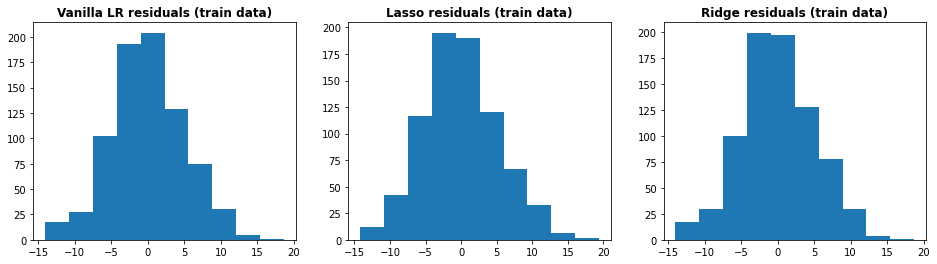

In [26]:
# plot model residuals on test data for gut check

plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
plt.hist(lr_ytrain_res)
plt.title('Vanilla LR residuals (train data)',fontweight='bold')

plt.subplot(1,3,2)
plt.hist(lasso_ytrain_res)
plt.title('Lasso residuals (train data)',fontweight='bold')

plt.subplot(1,3,3)
plt.hist(ridge_ytrain_res)
plt.title('Ridge residuals (train data)',fontweight='bold')

print('Vanilla LR resid. mean of: ',np.mean(lr_ytrain_res))
print('Lasso resid. mean of: ',np.mean(lasso_ytrain_res))
print('Ridge resid. mean of: ',np.mean(ridge_ytrain_res))

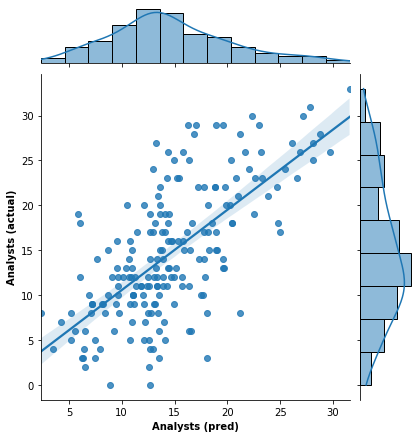

In [27]:
# ridge model predictions vs actual on test set

joint = sns.jointplot(x=ridge_ytest_preds,y=Y_test, kind='reg')
# joint.fig.suptitle('Ridge model predictions vs actual (test set)',fontweight='bold')
joint.set_axis_labels('Analysts (pred)', 'Analysts (actual)', fontweight='bold',fontsize=10)

In [28]:
# cross-reference to original df to pick up undercovered cos

ridge_df_preds = ridge.fit(X_train,Y_train).predict(df_X)
df_X['preds'] = ridge_df_preds

total_set_preds = pd.concat([df_agg[['equity','publishing_analysts']],df_X],axis=1)
total_set_preds['error'] = abs(total_set_preds.publishing_analysts - total_set_preds.preds)
total_set_preds['mean_error'] = np.mean(total_set_preds.error)
total_set_preds['std_error'] = np.std(total_set_preds.error)

total_set_preds[(total_set_preds.error>(total_set_preds.std_error*3)) & 
                (total_set_preds.publishing_analysts<total_set_preds.preds)][['equity','publishing_analysts','preds']]

,equity,publishing_analysts,preds
49,AMCR,8,21.237243
104,BEPC,1,12.155603
125,BR,6,16.271001
379,GME,3,15.157637
421,HRB,1,12.802262
459,IR,4,16.593816
478,JNJ,16,28.978855
501,L,0,12.707809
506,LBRDA,2,15.506863
507,LBRDK,2,15.506863
